Factor Analysis on users



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# from cleaning_pipeline import full_prod_orders

In [ ]:
# groupby order_id
# calc number items per department

In [ ]:
full_prod_orders.drop(['product_name', 'department', 'aisle'], axis=1, inplace=True)

In [9]:
test = full_prod_orders.sample(1000)

In [15]:
dept_user_df = full_prod_orders.groupby(['order_id','department'], as_index=False).product_id.agg('count')
dept_user_df = dept_user_df.pivot(index='order_id', columns='department', values = 'product_id')
dept_user_df = dept_user_df.fillna(0)

In [17]:
dept_user_df['total_items'] = dept_user_df.sum(axis=1)
cols = dept_user_df.columns[:-1]
dept_percent_df = dept_user_df[cols].div(dept_user_df.total_items, axis=0)

In [20]:
dept_percent_df.shape

(3346083, 21)

In [23]:
orders_fa = pd.read_csv('../data/orders_fa.csv', index_col=0)
orders_fa.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,item_count,percent_reorder
0,2539329,1,1,2,8,NaN,5,0.0
1,2398795,1,2,3,7,15.0,6,50.0
2,473747,1,3,3,12,21.0,5,60.0
3,2254736,1,4,4,7,29.0,5,100.0
4,431534,1,5,4,15,28.0,8,62.5


In [24]:
orders_fa = pd.merge(orders_fa, dept_percent_df, on=['order_id', 'order_id'])


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,item_count,percent_reorder,alcohol,babies,...,household,international,meat_seafood,missing,other,pantry,personal_care,pets,produce,snacks
0,2539329,1,1,2,8,NaN,5,0.0,0.0,0.0,...,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.40
1,2398795,1,2,3,7,15.0,6,50.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.50
2,473747,1,3,3,12,21.0,5,60.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.000000,0.40
3,2254736,1,4,4,7,29.0,5,100.0,0.0,0.0,...,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.40
4,431534,1,5,4,15,28.0,8,62.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.25


In [25]:
orders_fa.to_csv('../data/orders_fa.csv', index=False)

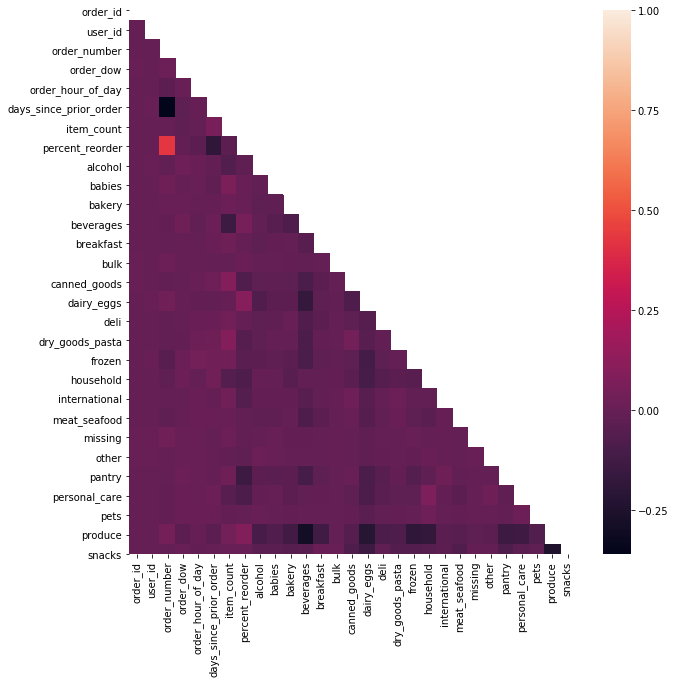

In [26]:
plt.figure(figsize=(10,10))
matrix_ = np.triu(orders_fa.corr())
sns.heatmap(orders_fa.corr(), mask=matrix_)

In [29]:
orders_fa['percent_reorder'].equals(orders_fa['order_number'])

False

In [34]:
orders_fa.babies.value_counts()

0.000000    3162009
0.166667       7718
0.142857       7444
0.200000       7413
0.125000       7228
             ...   
0.585366          1
0.189655          1
0.774194          1
0.741935          1
0.805556          1
Name: babies, Length: 742, dtype: int64

In [2]:
orders_fa = pd.read_csv('../data/orders_fa.csv')

In [5]:
orders_fa.days_since_prior_order.fillna(100, inplace=True)

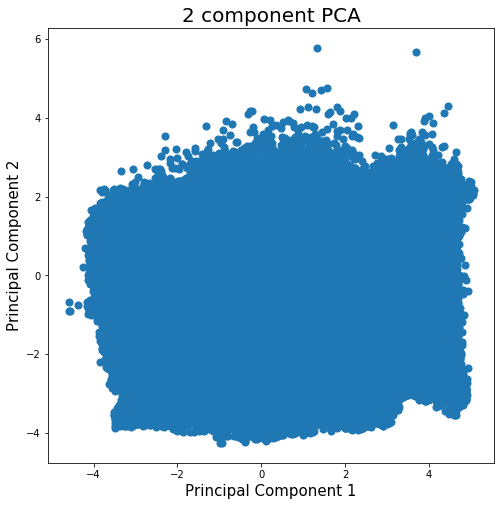

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pc_list = range(1, len(orders_fa.columns.tolist())+1)
pc_number = ['PC'+str(i) for i in pc_list]


scaler = StandardScaler()
scaler.fit(orders_fa)
df = scaler.transform(orders_fa)


# build PCA
pca = PCA()
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = pc_number)

# Plot PCA
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(principalDf[['PC1']],
           principalDf[['PC2']],
            s = 50)

In [12]:
from sklearn.cluster import MiniBatchKMeans
kmeans =  MiniBatchKMeans(n_clusters=800, random_state=42,batch_size=1000)
kmeans.fit(orders_fa)



KeyboardInterrupt: 

,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,item_count,percent_reorder,alcohol,babies,bakery,...,household,international,meat_seafood,missing,other,pantry,personal_care,pets,produce,snacks
user_id,,,,,,,,,,,,,,,,,,,,,
1,3367565,11,4,16,100.0,11,100.000000,0.0,0.000000,0.000000,...,0.200000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.0,0.500000,0.500000
2,3268552,15,5,15,100.0,31,88.888889,0.0,0.000000,0.111111,...,0.000000,0.111111,0.062500,0.000000,0.000000,0.222222,0.076923,0.0,0.333333,0.333333
3,3225766,12,3,19,100.0,11,100.000000,0.0,0.000000,0.000000,...,0.111111,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.0,0.600000,0.222222
4,3343014,5,6,15,100.0,7,14.285714,0.5,0.000000,0.250000,...,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.285714,0.333333
5,2717275,5,3,18,100.0,12,66.666667,0.0,0.000000,0.000000,...,0.111111,0.222222,0.000000,0.000000,0.000000,0.111111,0.000000,0.0,0.636364,0.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206205,2658896,4,5,16,100.0,19,85.714286,0.0,0.125000,0.142857,...,0.000000,0.052632,0.058824,0.125000,0.000000,0.052632,0.000000,0.0,0.428571,0.000000
206206,3394383,67,6,20,100.0,24,100.000000,0.0,0.000000,0.333333,...,0.500000,0.250000,0.142857,0.000000,0.333333,0.444444,0.500000,0.0,0.583333,0.750000
206207,3316103,16,6,21,100.0,25,100.000000,0.0,0.040000,0.166667,...,0.000000,0.041667,0.200000,0.000000,0.000000,0.400000,0.000000,0.0,0.400000,0.222222
